In [1]:
from itertools import groupby
from json import load
import pandas as pd
import scanpy as sc
import numpy as np
import sys
sys.path.insert(1, '/Users/greencode/Documents/Coding/Analysis-of-scRNA-Sequencing-Data')
import modules.classifyClusters.classifyClusters as classify
import modules.GO.geneOntology as geneOntology
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

geneOrderDataframe = pd.read_csv("./geneOrderDataframe.csv")
geneOrderDifference = pd.read_csv("./geneOrderDifference.csv")

geneOrder = geneOrderDifference["x"]
geneOrderDataframe = geneOrderDataframe.set_index(['Unnamed: 0'])

HSA21genesDataframe = pd.read_csv("./input/HSA21_genes_biomaRt_conversion.csv")
HSA21genes = [x for x in HSA21genesDataframe["hgnc_symbol"] if str(x) != 'nan']


In [2]:
geneDF = geneOrderDataframe.loc[geneOrder]
geneDF

,IN_2,IN_1,IN,nIN_1,nIN,nEN_1,nEN,IPC,MGE,RG
Unnamed: 0,,,,,,,,,,
AL162493.1,5.209542,5.560634,7.476096,4.213304,4.709158,6.102195,5.060730,3.953438,6.288717,6.227207
UTY,4.293762,3.495721,4.032896,3.220818,3.577509,3.478675,3.964579,3.946786,4.073173,4.007291
GATD3A,2.560773,3.132791,2.121661,6.257626,2.528890,2.339696,2.536648,3.464728,3.908067,2.962882
AC012645.1,1.048291,1.370197,2.224137,0.620783,1.975025,1.606304,1.907676,2.769599,2.456911,2.168941
LINC02506,2.196740,3.486658,4.286115,0.000000,1.853805,4.618229,3.544022,3.163313,1.797354,2.761874
...,...,...,...,...,...,...,...,...,...,...
EOMES,-3.433546,-2.756430,-3.513600,-1.331969,-3.575953,-3.126410,-0.291693,0.166487,-0.046475,-1.461727
WNT7B,-3.308608,-1.186389,-2.590960,-3.360764,-3.722531,-2.174432,-3.195118,-1.320506,-3.443115,-3.239431
LHX1,-4.821890,-2.011360,-4.298911,-3.159751,-2.754627,-1.479170,-3.119585,-1.992039,-2.517077,-2.249100


In [3]:
geneDF["average"] = geneDF.mean(axis=1)

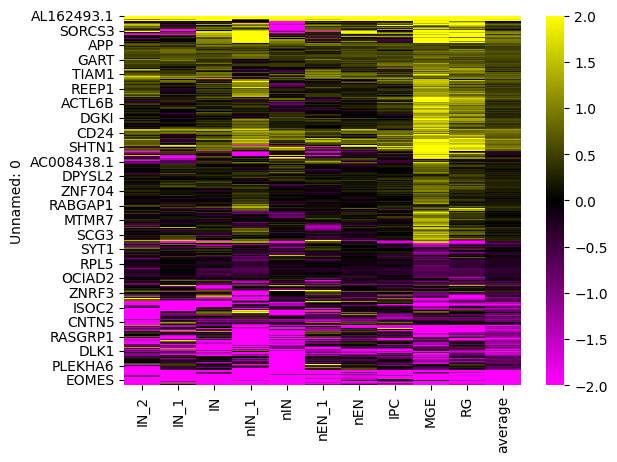

In [4]:
def plotHeatmap():
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["magenta","black","yellow"])
    ax = sns.heatmap(geneDF, vmin=-2, vmax=2, cmap=cmap)
    # plt.figure(figsize=(50,5))
    plt.show()
plotHeatmap()

In [5]:
geneDF

,IN_2,IN_1,IN,nIN_1,nIN,nEN_1,nEN,IPC,MGE,RG,average
Unnamed: 0,,,,,,,,,,,
AL162493.1,5.209542,5.560634,7.476096,4.213304,4.709158,6.102195,5.060730,3.953438,6.288717,6.227207,5.480102
UTY,4.293762,3.495721,4.032896,3.220818,3.577509,3.478675,3.964579,3.946786,4.073173,4.007291,3.809121
GATD3A,2.560773,3.132791,2.121661,6.257626,2.528890,2.339696,2.536648,3.464728,3.908067,2.962882,3.181376
AC012645.1,1.048291,1.370197,2.224137,0.620783,1.975025,1.606304,1.907676,2.769599,2.456911,2.168941,1.814786
LINC02506,2.196740,3.486658,4.286115,0.000000,1.853805,4.618229,3.544022,3.163313,1.797354,2.761874,2.770811
...,...,...,...,...,...,...,...,...,...,...,...
EOMES,-3.433546,-2.756430,-3.513600,-1.331969,-3.575953,-3.126410,-0.291693,0.166487,-0.046475,-1.461727,-1.937132
WNT7B,-3.308608,-1.186389,-2.590960,-3.360764,-3.722531,-2.174432,-3.195118,-1.320506,-3.443115,-3.239431,-2.754185
LHX1,-4.821890,-2.011360,-4.298911,-3.159751,-2.754627,-1.479170,-3.119585,-1.992039,-2.517077,-2.249100,-2.840351


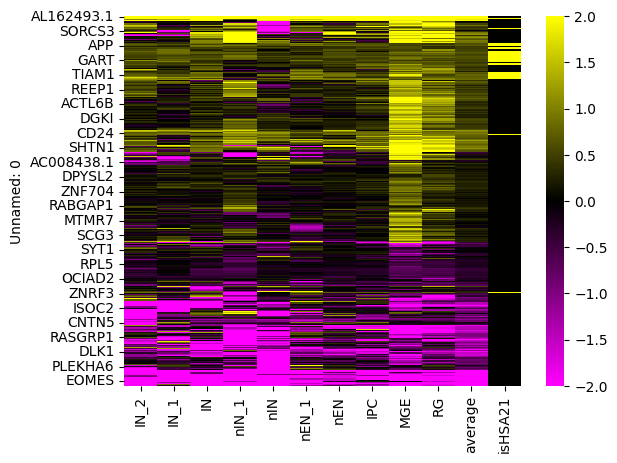

In [6]:
def markGenesList(array, string):
    HSA21BoolList = []
    for gene in geneOrder:
        if gene in array:
            HSA21BoolList.append(2)
        else:
            HSA21BoolList.append(0)
    geneDF[string] = HSA21BoolList

markGenesList(HSA21genes, "isHSA21")
plotHeatmap()

In [7]:
for filename in os.listdir("../clusterGeneNames/filesExperiment/"):
    df = pd.read_csv('../clusterGeneNames/filesExperiment/'+filename, sep='\t', header=0)
    markGenesList(df["id"].tolist(), filename)

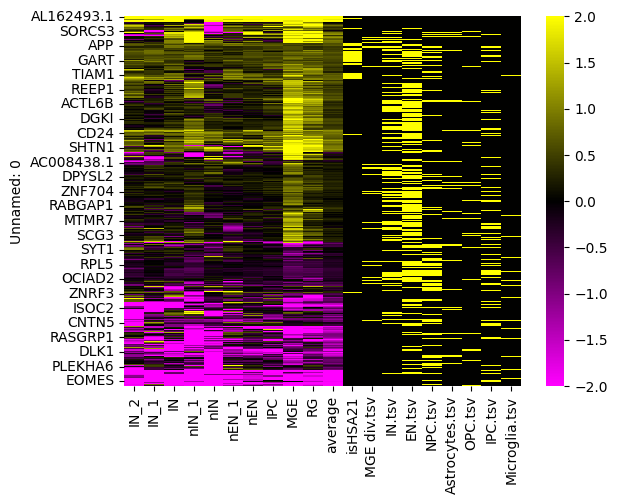

In [8]:
plotHeatmap()

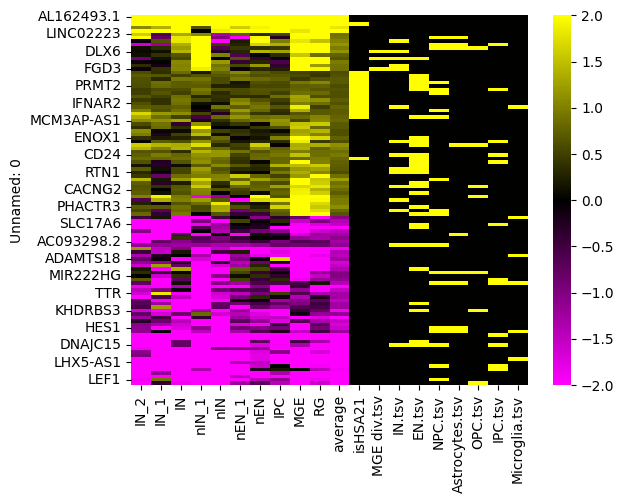

In [9]:
geneDF = geneDF.loc[(geneDF["average"] >= 0.6) | (geneDF["average"] <= -1)]
plotHeatmap()

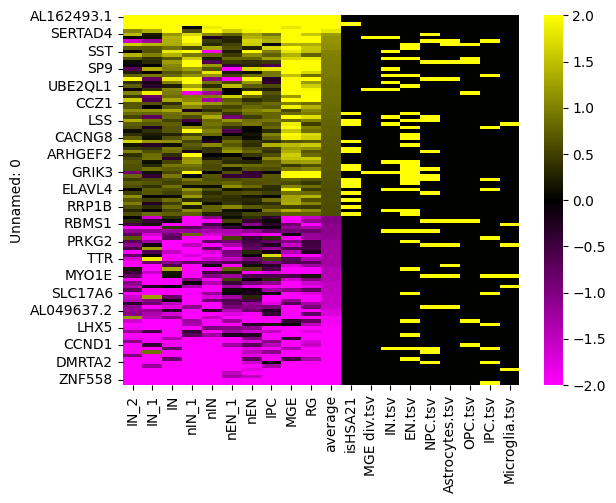

In [10]:
geneDF = geneDF.sort_values(by=['average'], ascending=False)
plotHeatmap()

In [11]:
positiveGenes = geneDF.loc[geneDF["average"] >= 0.6]
negativeGenes = geneDF.loc[geneDF["average"] <= -1]